**Importing Working libraries**

In [1]:
import pandas as pd  # Pandas Library for Dataframe
import numpy as np  # Numpy Library for Numerical Calculations
import matplotlib.pyplot as plt  # Matplotlib and for Plottings
import seaborn as sns

**Loading the Datasets and Finding some informations about data**

**Load first Dataset**

In [4]:
aqi_data=pd.read_csv("D:\\data science\\Air Purifier Development\\aqi.csv")
aqi_data

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
...,...,...,...,...,...,...,...,...,...
235780,01-04-2022,Bihar,Arrah,1,PM10,210,Poor,number_of_monitoring_stations in Absolute Numb...,NaN
235781,01-04-2022,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
235782,01-04-2022,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...,NaN
235783,01-04-2022,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN


In [6]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [7]:
aqi_data.isnull().sum()

date                                  0
state                                 0
area                                  0
number_of_monitoring_stations         0
prominent_pollutants                  0
aqi_value                             0
air_quality_status                    0
unit                                  0
note                             235785
dtype: int64

In [8]:
# convert data tpye into datetime formate.
aqi_data["date"] = pd.to_datetime(aqi_data["date"],dayfirst=True,format="%d-%m-%Y")
aqi_data["date"].dtype

dtype('<M8[ns]')

**Add new columns**

In [9]:
aqi_data['year'] = aqi_data['date'].dt.year

In [10]:
aqi_data['month'] = aqi_data['date'].dt.to_period('M').astype(str)

In [11]:
# Check the all types of pollutants and uniqueness.
aqi_data["prominent_pollutants"].unique()

array(['PM10', 'CO', 'O3', 'PM2.5', 'SO2', 'PM2.5,PM10', 'PM10,NO2',
       'PM10,O3', 'O3,PM2.5,PM10', 'PM10,O3,CO', 'PM10,CO', 'PM2.5,O3',
       'PM10,SO2', 'PM2.5,CO,O3', 'NO2', 'PM10,PM2.5,NO2', 'CO,O3',
       'PM2.5,PM10,CO', 'PM2.5,SO2,O3', 'PM10,NO2,O3', 'SO2,O3',
       'PM10,NH3,CO', 'PM10,NO2,PM2.5,O3', 'NO2,PM10,CO', 'CO,SO2',
       'PM2.5,NO2', 'PM10,CO,SO2', 'PM2.5,NO2,SO2', 'PM10,SO2,O3',
       'PM10,NO2,SO3', 'PM2.5,NH3,O3', 'PM10,PM2.5,SO2', 'NO2,O3',
       'PM2.5,SO2', 'CO,NO2', 'NH3', 'PM2.5,CO,NO2', 'PM2.5,NH3',
       'NO2,SO2', 'PM2.5,CO,SO2', 'SO3,CO,O3', 'NO2,CO,O3', 'NO2,SO2,CO',
       'NO2,O3,SO2', 'PM10,NH3', 'NH3,CO,O3', 'PM10,NH3,O3', 'O3,NH3',
       'PM2.5,NH3,CO'], dtype=object)

In [12]:
aqi_data["prominent_pollutants"].value_counts()

prominent_pollutants
PM10                 111053
PM2.5                 59670
O3                    16202
PM2.5,PM10            13199
CO                    12867
PM10,O3                3914
SO2                    3815
NO2                    3012
PM10,CO                2658
PM2.5,O3               2088
PM10,NO2               1278
O3,PM2.5,PM10          1019
PM2.5,PM10,CO           710
PM10,SO2                551
CO,O3                   543
PM10,O3,CO              418
PM2.5,NO2               415
PM10,PM2.5,NO2          281
PM2.5,SO2               278
CO,NO2                  274
PM10,NO2,O3             216
NO2,PM10,CO             191
CO,SO2                  167
NO2,O3                  139
PM10,PM2.5,SO2          111
SO2,O3                  109
PM2.5,CO,O3              99
PM10,CO,SO2              69
NH3                      69
PM10,SO2,O3              65
NO2,CO,O3                49
PM10,NO2,PM2.5,O3        43
PM2.5,CO,NO2             40
PM2.5,CO,SO2             36
NO2,SO2                  34

In [13]:
# Check the all types of air_quality_status.
aqi_data["air_quality_status"].unique()

array(['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [15]:
# Show the poor air_quality areas and states
aqi_data[aqi_data["air_quality_status"]=="Poor"][["area","state"]]

,area,state
30,Sawai Madhopur,Rajasthan
35,Nagaur,Rajasthan
43,Pali,Rajasthan
60,Kota,Rajasthan
65,Dausa,Rajasthan
...,...,...
235772,Bhiwadi,Rajasthan
235776,Charkhi Dadri,Haryana
235780,Arrah,Bihar
235782,Chandrapur,Maharashtra


In [14]:
# find the mean and min of the poor aqi_value 
y=aqi_data[aqi_data["air_quality_status"]=="Poor"]
y["aqi_value"].mean(),y["aqi_value"].min()

(241.30041599697458, 201)

In [18]:
# find the mean and max of the Satisfactory aqi_value 
b=aqi_data[aqi_data["air_quality_status"]=="Satisfactory"]
b["aqi_value"].mean()
# <74.06523279750722 --- satisfactory , good or very good
b["aqi_value"].max()

100

In [117]:
aqi_data["aqi_value"].describe()

count    235785.000000
mean        111.127294
std          71.447353
min           3.000000
25%          59.000000
50%          92.000000
75%         142.000000
max         500.000000
Name: aqi_value, dtype: float64

*Top areas with poor AQI*

In [121]:
poor_state = pd.DataFrame(aqi_data[aqi_data["aqi_value"]>150][["state","area"]].value_counts().reset_index())

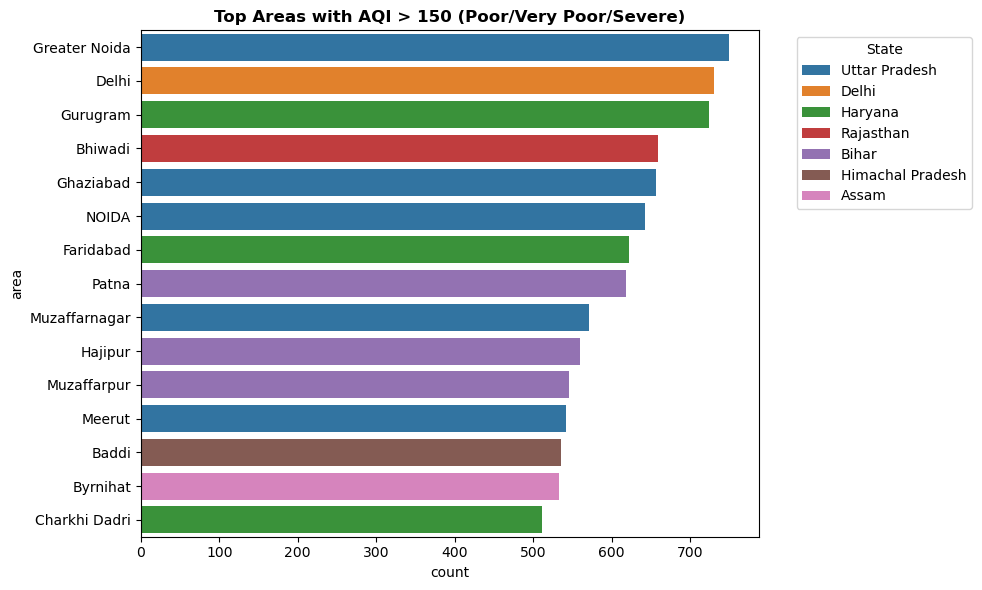

In [125]:
# Sort top 15 worst-hit areas
top_poor = poor_state.sort_values("count", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=top_poor,x="count", y="area", hue="state", dodge=False)
plt.title("Top Areas with AQI > 150 (Poor/Very Poor/Severe)", fontsize=12, weight="bold")
plt.legend(title="State", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [127]:
aqi_data[aqi_data["air_quality_status"]=="Satisfactory"]["aqi_value"].unique()

array([ 78,  56,  98,  61,  73,  68,  58,  51,  84,  66,  99,  67,  75,
        89,  74,  94,  87,  71,  70,  93,  63,  52,  53,  79,  60,  88,
        55,  59,  82,  90,  65,  91,  57,  72,  86, 100,  77,  80,  92,
        64,  83,  69,  76,  54,  85,  95,  97,  62,  81,  96], dtype=int64)

*List the top 5 and bottom 5 areas with highest average AQI. (Consider areas which contains data from last 6 months: December 2024 to May 2025)*

Top 5 Areas:
       state         area     avg_aqi
11    Assam     Byrnihat  284.194915
50    Delhi        Delhi  238.920000
27    Bihar      Hajipur  233.666667
59  Haryana  Bahadurgarh  226.437500
66  Haryana     Gurugram  204.143836

Bottom 5 Areas:
           state            area    avg_aqi
90    Karnataka  Chamarajanagar  44.807692
111   Karnataka      Vijayapura  44.328767
103   Karnataka        Madikeri  42.951049
242  Tamil Nadu   Palkalaiperur  42.794872
250  Tamil Nadu     Tirunelveli  33.310078


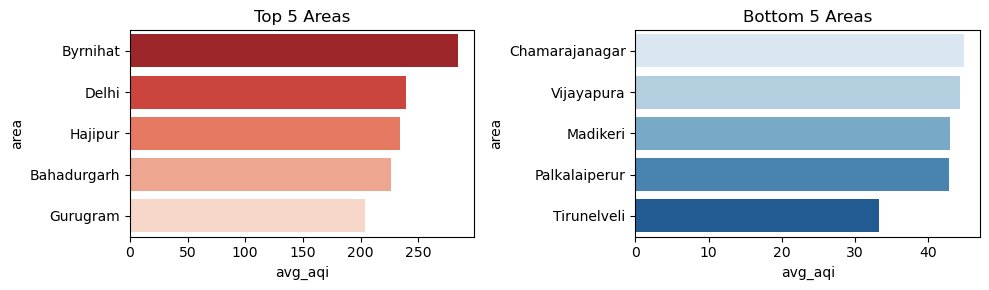

In [132]:
# Filter data for Dec 2024 – May 2025
mask = (aqi_data['date'] >= '2024-12-01') & (aqi_data['date'] <= '2025-05-31')
aqi_6mo = aqi_data.loc[mask]

# Group by state, city, and area → compute average AQI
area_avg = (aqi_6mo.groupby(['state', 'area'])['aqi_value'].mean().reset_index(name='avg_aqi').sort_values('avg_aqi', ascending=False))

# Top 5 and Bottom 5
top_5_areas = pd.DataFrame(area_avg.head(5))
bottom_5_areas = pd.DataFrame(area_avg.tail(5))

print("Top 5 Areas:\n", top_5_areas)
print("\nBottom 5 Areas:\n", bottom_5_areas)

# show in graph plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Top 5 Areas")
sns.barplot(x='avg_aqi', y='area',hue='area', data=top_5_areas, palette='Reds_r',legend=False)
plt.subplot(1,2,2)
plt.title("Bottom 5 Areas")
sns.barplot(x='avg_aqi', y='area',hue ='area', data=bottom_5_areas, palette='Blues',legend=False)
plt.tight_layout()
plt.show()

*List out top 2 and bottom 2 prominent pollutants for each state of southern India. (Consider data post covid: 2022 onwards)*

In [157]:
# List of southern states
southern_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Puducherry']

# Filter AQI data for post-COVID years (2022 onwards)
aqi_postcovid = aqi_data[aqi_data['year'] >= 2022]

# Dictionary to store results
result_pollutants = {}

# Keep only relevant columns
dp = aqi_postcovid[['state', 'prominent_pollutants']].dropna()
dp['state'] = dp['state'].str.strip()
    
# Count occurrences of each pollutant in each state
pollutant_counts = dp.groupby([aqi_postcovid['state'], aqi_postcovid['prominent_pollutants']]).size().reset_index(name='count')
    
for state in southern_states:
    state_data = pollutant_counts[pollutant_counts['state'].str.contains(state, case=False)]
    if state_data.empty:
        result_pollutants[state] = {'top2': [], 'bottom2': []}
    else:
        sorted_data = state_data.sort_values(by='count', ascending=False)
        result_pollutants[state] = {
            'top2': sorted_data.head(2)['prominent_pollutants'].tolist(),
            'bottom2': sorted_data.tail(2)['prominent_pollutants'].tolist()
        }
# Convert dictionary to tidy DataFrame
records = []
for state, vals in result_pollutants.items():
    for cat, pollutants in vals.items():
        for pollutant in pollutants:
            records.append({"state": state, "category": cat, "pollutant": pollutant})

result_df = pd.DataFrame(records)
result_df

,state,category,pollutant
0,Andhra Pradesh,top2,PM10
1,Andhra Pradesh,top2,PM2.5
2,Andhra Pradesh,bottom2,"PM10,NO2,PM2.5,O3"
3,Andhra Pradesh,bottom2,"PM10,NO2,O3"
4,Karnataka,top2,PM10
5,Karnataka,top2,CO
6,Karnataka,bottom2,"NO2,O3"
7,Karnataka,bottom2,"SO2,O3"
8,Kerala,top2,PM10
9,Kerala,top2,PM2.5


*Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)?*

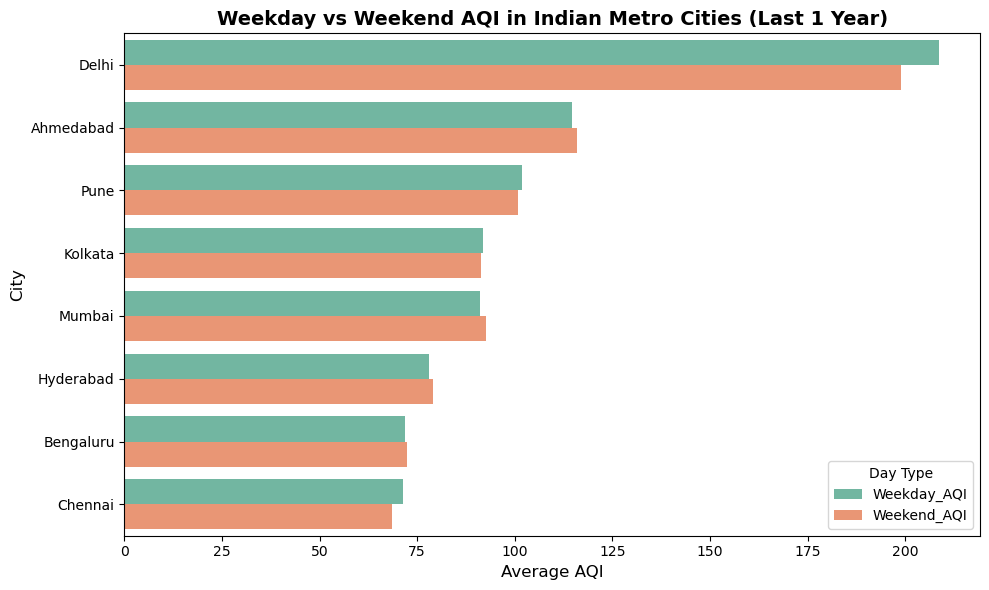

In [172]:
#    (Consider data from last 1 year)

# Keep only last 1 year data
last_date = aqi_data['date'].max()
one_year_ago = last_date - pd.DateOffset(years=1)
aqi_last_year = aqi_data[aqi_data['date'] >= one_year_ago].copy()

# Add weekday and weekend column
aqi_last_year['day_of_week'] = aqi_last_year['date'].dt.day_name()
aqi_last_year['is_weekend'] = aqi_last_year['day_of_week'].isin(['Saturday', 'Sunday'])

# Focus on 8 metro cities
metro_cities = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune"]
aqi_metro = aqi_last_year[aqi_last_year['area'].isin(metro_cities)].copy()

# Group by city and weekend/weekday
result = aqi_metro.groupby(['area', 'is_weekend'])['aqi_value'].mean().reset_index()

# Pivot for easy comparison
result_pivot = result.pivot(index='area', columns='is_weekend', values='aqi_value')
result_pivot = result_pivot.rename(columns={False: 'Weekday_AQI', True: 'Weekend_AQI'})
final = result_pivot.sort_values(by=["Weekday_AQI","Weekend_AQI"],ascending=False).reset_index()

# Convert final into long format
plot_data = final.melt(
    id_vars="area",
    value_vars=["Weekday_AQI", "Weekend_AQI"],
    var_name="Day_Type",
    value_name="AQI"
)

# Single graph with Weekday vs Weekend comparison
plt.figure(figsize=(10,6))
sns.barplot(x="AQI", y="area", hue="Day_Type", data=plot_data, palette="Set2")

plt.title("Weekday vs Weekend AQI in Indian Metro Cities (Last 1 Year)", fontsize=14, weight='bold')
plt.xlabel("Average AQI", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()

*Which months consistently show the worst air quality across Indian states — (Consider top 10 states with high distinct areas)*

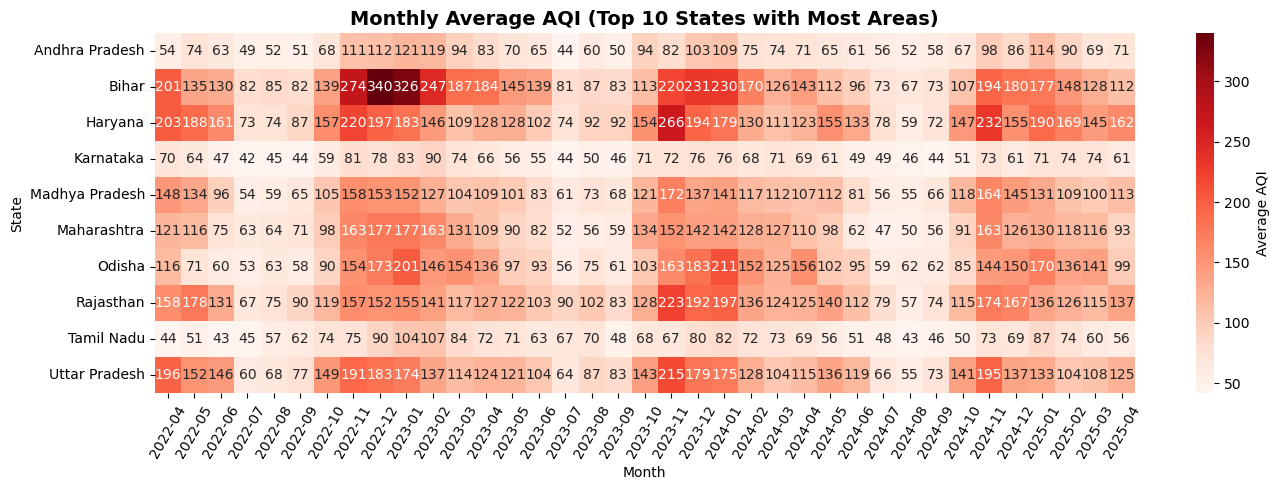

In [175]:
# Top 10 states with highest distinct areas
top_states = (aqi_data.groupby('state')['area'].nunique().sort_values(ascending=False).head(10).index)

# Filter data for these states
aqi_top_states = aqi_data[aqi_data['state'].isin(top_states)]

# Compute average AQI by state and month
state_month_avg = (aqi_top_states.groupby(['state', 'month'])['aqi_value'].mean().reset_index())

# Pivot for heatmap
heatmap_data = state_month_avg.pivot(index="state", columns="month", values="aqi_value")

# Plot heatmap
plt.figure(figsize=(14,5))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f", cbar_kws={'label': 'Average AQI'})

plt.title("Monthly Average AQI (Top 10 States with Most Areas)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("State")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

*For the city of Bengaluru, how many days fell under each air quality category (e.g., Good, Moderate, Poor, etc.) between March and May 2025?*

In [30]:
# Filter for Bengaluru between March–May 2025
mask = ((aqi_data['area'] == 'Bengaluru') & (aqi_data['date'] >= '2025-03-01') & (aqi_data['date'] <= '2025-05-31'))
bengaluru_data = aqi_data.loc[mask]

# Count days under each air quality status
category_counts = bengaluru_data.groupby('air_quality_status')['date'].nunique().reset_index()
category_counts = category_counts.rename(columns={'date': 'days_count'})

category_counts

,air_quality_status,days_count
0,Moderate,13
1,Satisfactory,48


**Load Second Dataset**

In [179]:
idsp_data= pd.read_csv("D:\\data science\\Air Purifier Development\\idsp.csv",encoding='latin1')
idsp_data.head(2)

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN


In [34]:
idsp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    6474 non-null   int64 
 1   week                    6474 non-null   int64 
 2   outbreak_starting_date  6474 non-null   object
 3   reporting_date          5455 non-null   object
 4   state                   6474 non-null   object
 5   district                6473 non-null   object
 6   disease_illness_name    6469 non-null   object
 7   status                  6474 non-null   object
 8   cases                   6474 non-null   int64 
 9   deaths                  6474 non-null   int64 
 10  unit                    6474 non-null   object
 11  note                    6 non-null      object
dtypes: int64(4), object(8)
memory usage: 607.1+ KB


In [35]:
idsp_data.isnull().sum()

year                         0
week                         0
outbreak_starting_date       0
reporting_date            1019
state                        0
district                     1
disease_illness_name         5
status                       0
cases                        0
deaths                       0
unit                         0
note                      6468
dtype: int64

In [36]:
# check trhe last 50 data
idsp_data.tail(50)

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
6424,2022,16,22-04-2022,23-04-2022,Tamil Nadu,Thanjavur,Food Poisoning,Reported in Same Week,11,0,"cases in absolute number, deaths in absolute n...",NaN
6425,2022,16,18-04-2022,25-04-2022,Tamil Nadu,Ariyalur,Fever with Rash,Reported in Same Week,9,0,"cases in absolute number, deaths in absolute n...",NaN
6426,2022,16,17-04-2022,18-04-2022,Telangana,Nalgonda,Food Poisoning,Reported in Same Week,60,0,"cases in absolute number, deaths in absolute n...",NaN
6427,2022,16,21-04-2022,25-04-2022,Uttarakhand,Dehradun,Hepatitis A,Reported in Same Week,5,0,"cases in absolute number, deaths in absolute n...",NaN
6428,2022,16,19-04-2022,20-04-2022,West Bengal,South 24 Paraganas,Acute Diarrheal Disease,Reported in Same Week,71,0,"cases in absolute number, deaths in absolute n...",NaN
6429,2022,16,18-04-2022,19-04-2022,West Bengal,Bardhaman,Acute Diarrheal Disease,Reported in Same Week,91,0,"cases in absolute number, deaths in absolute n...",NaN
6430,2022,16,17-04-2022,17-04-2022,West Bengal,Howrah,Cholera,Reported in Same Week,53,0,"cases in absolute number, deaths in absolute n...",NaN
6431,2022,15,04-10-2022,04-12-2022,Jharkhand,Godda,Measles,Reported in Same Week,14,0,"cases in absolute number, deaths in absolute n...",NaN
6432,2022,15,04-11-2022,04-12-2022,Karnataka,Tumakuru,Food Poisoning,Reported in Same Week,19,0,"cases in absolute number, deaths in absolute n...",NaN
6433,2022,15,06-04-2022,NaN,Karnataka,Bellary,Chikungunya,Reported Late,11,0,"cases in absolute number, deaths in absolute n...",NaN


In [37]:
# convert data type into datetime.
idsp_data["outbreak_starting_date"] = pd.to_datetime(idsp_data["outbreak_starting_date"],dayfirst=True)
idsp_data["outbreak_starting_date"].dtype

dtype('<M8[ns]')

In [38]:
#  'Acute Respiratandy Illness' and find the unique disease name.
idsp_data["disease_illness_name"].unique()

array(['Acute Diarrheal Disease', 'Chickenpox', 'Food Poisoning',
       'Fever with Rash', 'Measles', 'Hepatitis A', 'Typhoid', 'Malaria',
       'Shigellosis', 'Acute Gastroenteritis', 'Scrub Typhus',
       'Chikungunya', 'Mumps', 'Hepatitis A and E', 'Hepatitis B and C',
       'Leishmaniasis', 'Dengue', 'Human Rabies', 'West Nile Fever',
       'Cholera', 'HMPV', 'Mpox', 'Others', 'Fever', 'Meningitis',
       'Jaundice', 'Acute Hepatitis A', 'Rabies', 'Paratyphoid', nan,
       'Acute Hepatitis E', 'Pertussis', 'Rubella', 'Champaran',
       'Measles and Rubella', 'Hepatitis', 'Gastroenteritis',
       'Nile Fever', 'Poisoning', 'Nagar', 'Hepatitis E',
       'Crimean Congo Haemandrhagic Fever (CCHF)',
       'Japanese Encephalitis', 'Diarrhoea', 'Leptospirosis',
       'Acute Gastroenteritis (Norovirus)', 'Dengue and Chikungunya',
       'Dysentery', 'Diphtheria', 'Acute Hepatitis', 'Forest Disease',
       'Enteric Fever', 'Fever with rash', 'Scrub typhus', 'Zika Virus',
      

*List the top two most reported disease illnesses in each state over the past three years, along with the corresponding average Air Quality Index*

In [234]:
# Filter disease dataset (last 3 years)
current_year = idsp_data['year'].max()
last_3_years = list(range(current_year - 2, current_year + 1))
disease_recent = idsp_data[idsp_data['year'].isin(last_3_years)]

# Top 2 diseases per state
disease_summary = (disease_recent.groupby(['state', 'disease_illness_name'])['cases'].sum().reset_index()
    .sort_values(['state', 'cases'], ascending=[True, False])
)

top2_diseases = (disease_summary.groupby('state').head(2).reset_index(drop=True))

# Average AQI per state (last 3 years)
cutoff_date = aqi_data['date'].max() - pd.DateOffset(years=3)
aqi_recent = aqi_data[aqi_data['date'] >= cutoff_date]

state_aqi = (aqi_recent.groupby('state')['aqi_value'].mean().reset_index().rename(columns={'aqi_value': 'avg_aqi'}))

# Merge
final_result = top2_diseases.merge(state_aqi, on='state', how='left')

final_result.head(60)

,state,disease_illness_name,cases,avg_aqi
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,94,57.706897
1,Andaman and Nicobar Islands,Fever with Rash,8,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,3189,77.903189
3,Andhra Pradesh,Cholera,1081,77.903189
4,Arunachal,Rabies,1,NaN
5,Arunachal Pradesh,Acute Diarrheal Disease,290,54.453649
6,Arunachal Pradesh,Mumps,133,54.453649
7,Assam,Acute Diarrheal Disease,2683,114.407809
8,Assam,Food Poisoning,1791,114.407809
9,Bihar,Acute Diarrheal Disease,1316,155.996001


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


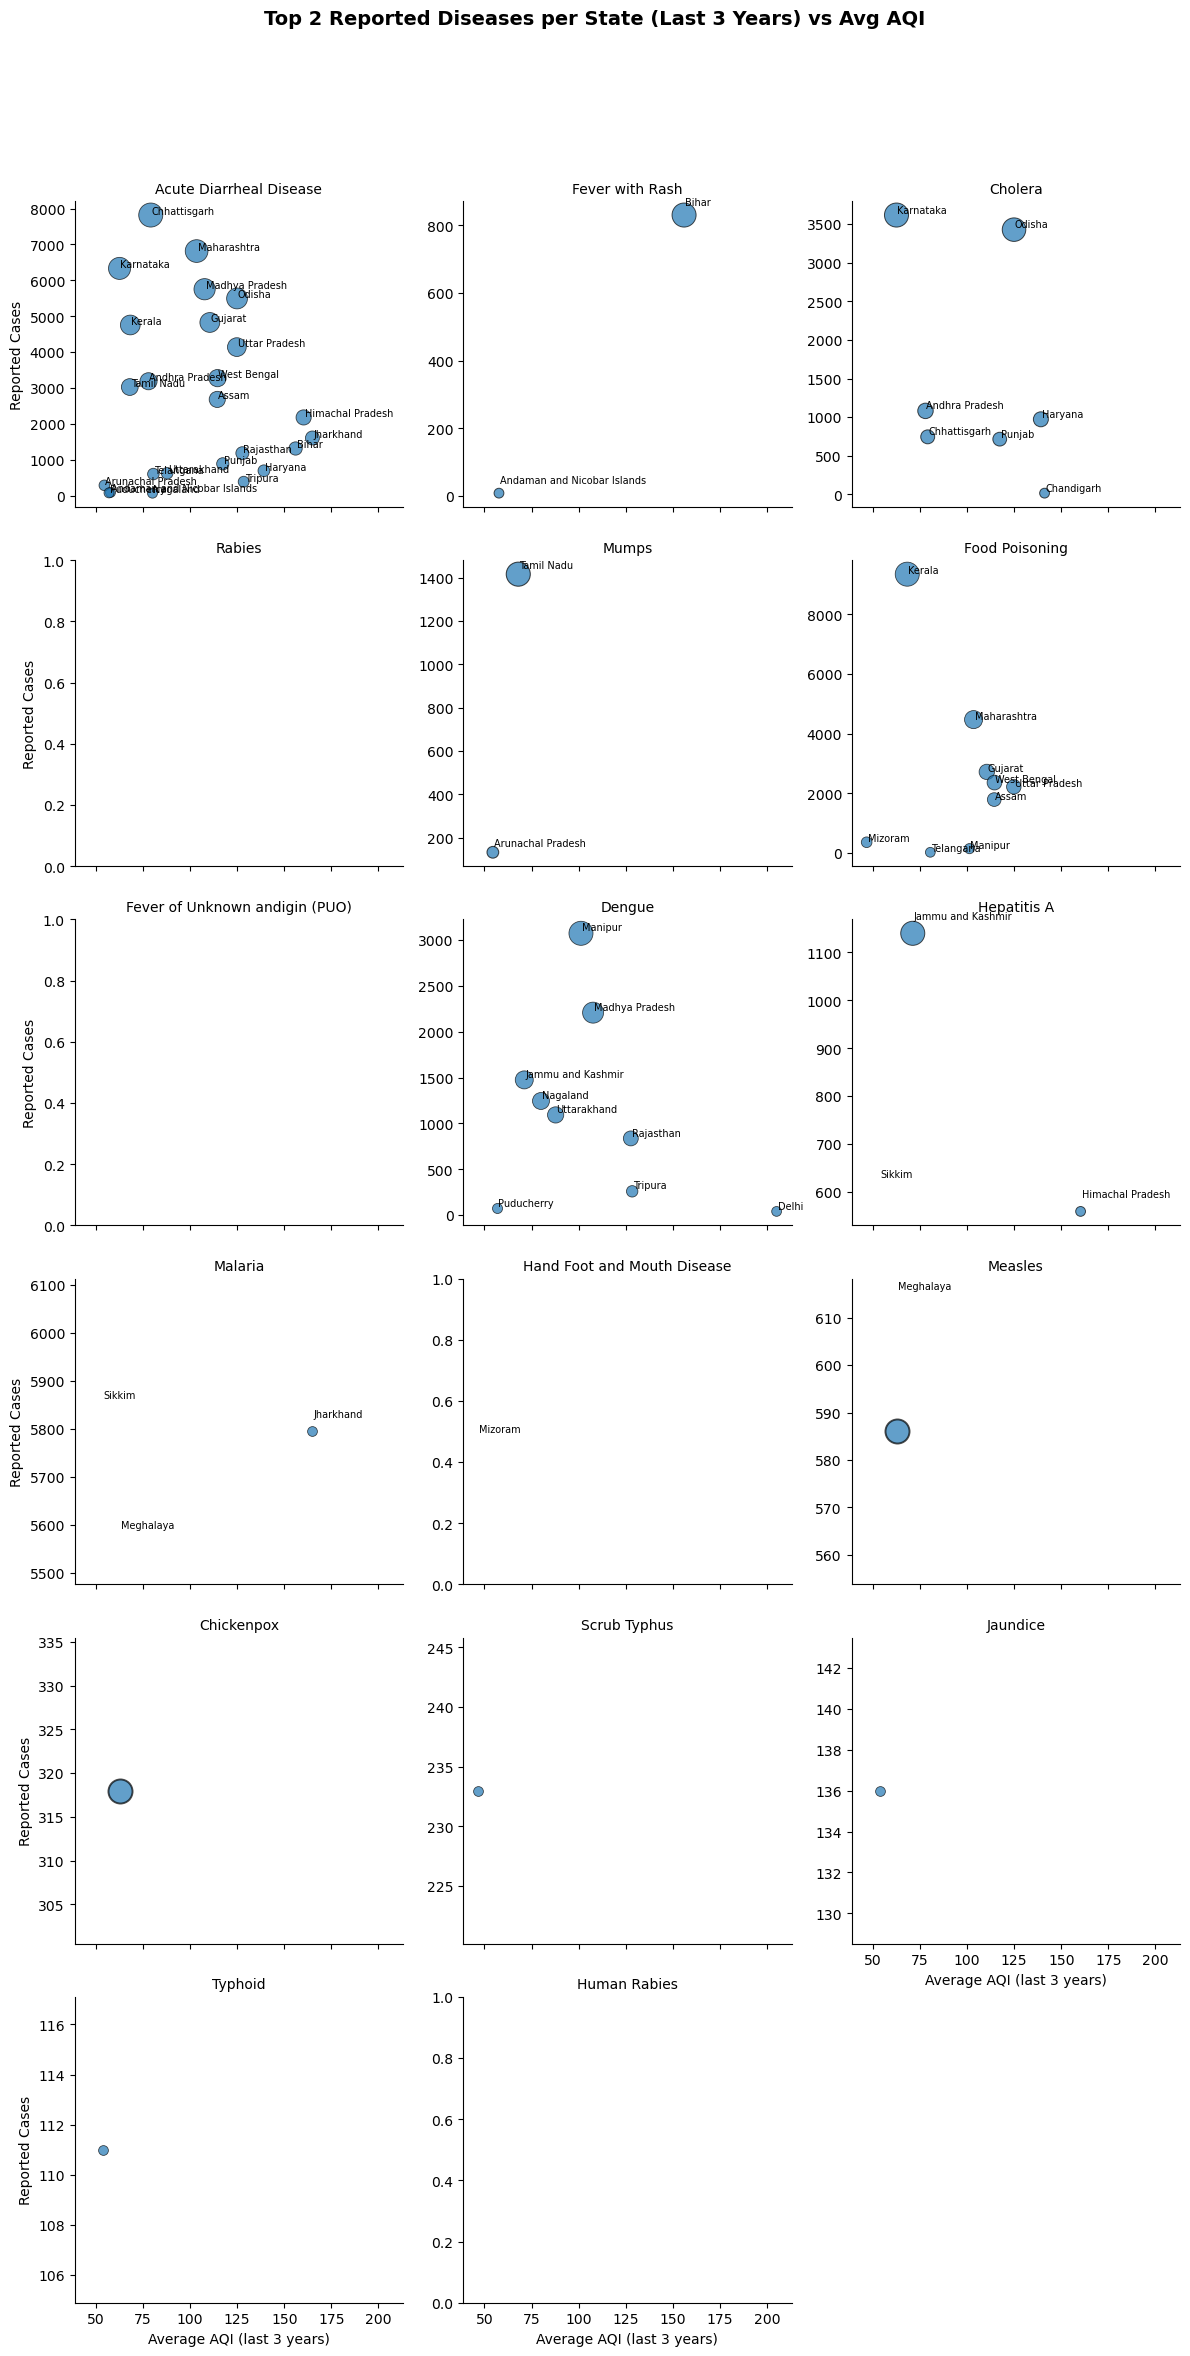

In [252]:
# FacetGrid: one subplot per disease
g = sns.FacetGrid(final_result, col="disease_illness_name", col_wrap=3, height=4, sharey=False, sharex=True)

g.map_dataframe(sns.scatterplot, x="avg_aqi", y="cases", size="cases", sizes=(50,300), alpha=0.7, edgecolor="k")

# Add state labels
for ax in g.axes.flatten():
    data_ax = final_result[final_result["disease_illness_name"] == ax.get_title().split(" = ")[1]]
    for i, row in data_ax.iterrows():
        ax.text(row["avg_aqi"]+0.5, row["cases"]+30, row["state"], fontsize=7)

g.set_axis_labels("Average AQI (last 3 years)", "Reported Cases")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 2 Reported Diseases per State (Last 3 Years) vs Avg AQI", fontsize=14, weight="bold")

plt.show()

**load third Dataset.**

In [44]:
vahan_data= pd.read_csv("D:\\data science\\Air Purifier Development\\vahan.csv")
vahan_data

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN
...,...,...,...,...,...,...,...,...,...
64836,2022,April,West Bengal,All Vahan Running Office,THREE WHEELER (PASSENGER),PETROL/CNG,3,value in Absolute Number,NaN
64837,2022,April,West Bengal,All Vahan Running Office,THREE WHEELER (PASSENGER),PETROL/LPG,82,value in Absolute Number,NaN
64838,2022,April,West Bengal,All Vahan Running Office,TRACTOR (COMMERCIAL),DIESEL,247,value in Absolute Number,NaN
64839,2022,April,West Bengal,All Vahan Running Office,TRAILER (COMMERCIAL),NOT APPLICABLE,60,value in Absolute Number,NaN


In [45]:
vahan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64841 entries, 0 to 64840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           64841 non-null  int64  
 1   month          64841 non-null  object 
 2   state          64841 non-null  object 
 3   rto            64841 non-null  object 
 4   vehicle_class  64841 non-null  object 
 5   fuel           64841 non-null  object 
 6   value          64841 non-null  int64  
 7   unit           64841 non-null  object 
 8   note           0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.5+ MB


In [46]:
vahan_data.isnull().sum()

year                 0
month                0
state                0
rto                  0
vehicle_class        0
fuel                 0
value                0
unit                 0
note             64841
dtype: int64

In [47]:
vahan_data.columns

Index(['year', 'month', 'state', 'rto', 'vehicle_class', 'fuel', 'value',
       'unit', 'note'],
      dtype='object')

*List the top 5 states with high EV adoption and analyse if their average AQI is significantly better compared to states with lower EV adoption*

Top 5 States
            state  ev_count     avg_aqi
0  Uttar Pradesh     79547  116.308819
1          Bihar     22308  126.999108
2          Delhi     18297  205.912329
3      Karnataka     17618   58.715418
4          Assam     16205  103.231738
bottom 5 States
                                        state  ev_count    avg_aqi
28  Dadra and Nagar Haveli and Daman and Diu        34        NaN
29               Andaman and Nicobar Islands        14  57.706897
30                         Arunachal Pradesh        10  57.300971
31                               Lakshadweep         2        NaN
32                                  Nagaland         1  77.331210


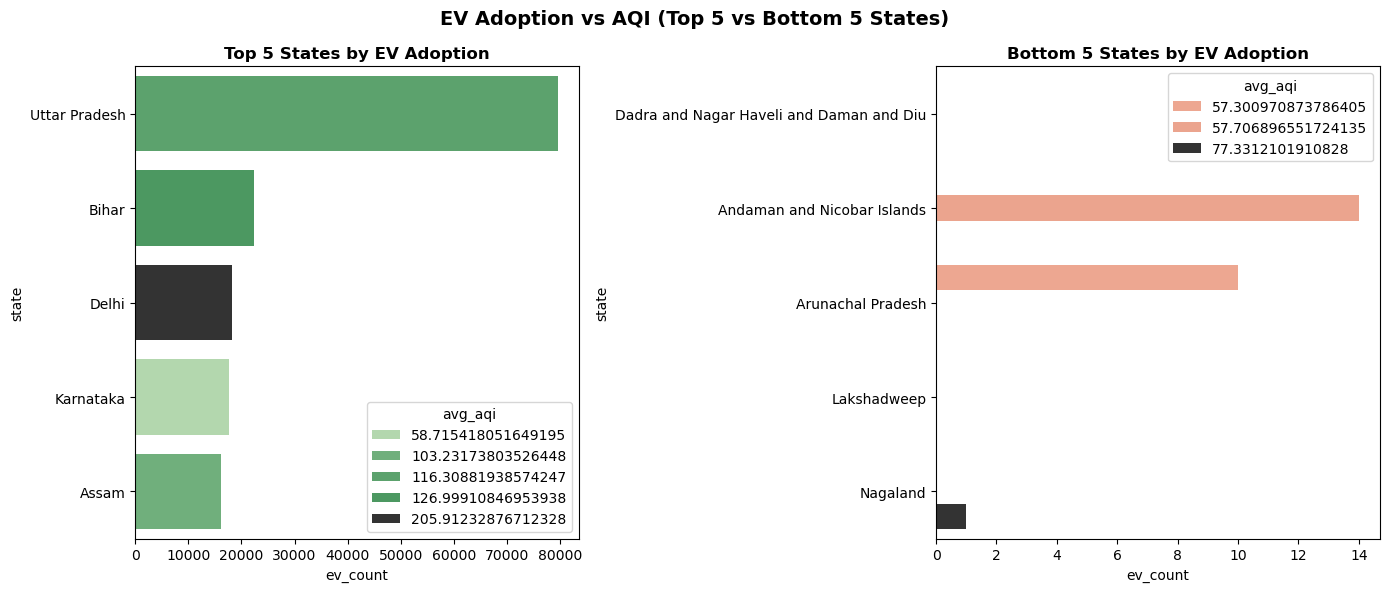

In [294]:
# Filter only Electric vehicles
ev_only = vahan_data[vahan_data['fuel'].str.contains("ELECTRIC", case=False, na=False)]

# Sum EV adoption per state (latest year available)
latest_year = ev_only['year'].max()
ev_latest = (ev_only[ev_only['year'] == latest_year].groupby('state')['value'].sum().reset_index(name='ev_count').sort_values('ev_count', ascending=False))

# Top 5 and bottom states by EV adoption
top5_states = ev_latest.head(5)['state'].tolist()
bottom5_states = ev_latest.tail(5)['state'].tolist()

# Average AQI per state
aqi_recent = aqi_data[aqi_data['date'] >= (aqi_data['date'].max() - pd.DateOffset(years=1))]

state_aqi = aqi_recent.groupby('state')['aqi_value'].mean().reset_index(name='avg_aqi').sort_values('avg_aqi', ascending=False)

# Merge AQI with EV data
ev_aqi = ev_latest.merge(state_aqi, on='state', how='left')

# Separate top vs bottom
top5_aqi = ev_aqi[ev_aqi['state'].isin(top5_states)]
bottom5_aqi = ev_aqi[ev_aqi['state'].isin(bottom5_states)]

print("Top 5 States\n",top5_aqi)
print("bottom 5 States\n",bottom5_aqi)

plt.figure(figsize=(14,6))
# Top 5 states
plt.subplot(1, 2, 1)
sns.barplot(data=top5_aqi, x="ev_count", y="state",hue="avg_aqi", palette="Greens_d")
plt.title("Top 5 States by EV Adoption", fontsize=12, weight="bold")

# Bottom 5 states
plt.subplot(1, 2, 2)
sns.barplot(data=bottom5_aqi, x="ev_count", y="state",hue="avg_aqi", palette="Reds_d")
plt.title("Bottom 5 States by EV Adoption", fontsize=12, weight="bold")

plt.suptitle("EV Adoption vs AQI (Top 5 vs Bottom 5 States)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

**Load Fourth Dataset**

In [50]:
popu= pd.read_csv("D:\\data science\\Air Purifier Development\\population_projection.csv")
popu

,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN
1,2036,October,West Bengal,Male,22615,value in Thousands,NaN
2,2036,October,West Bengal,Female,21349,value in Thousands,NaN
3,2036,October,Uttarakhand,Total,5506,value in Thousands,NaN
4,2036,October,Uttarakhand,Male,2922,value in Thousands,NaN
...,...,...,...,...,...,...,...
8887,2011,July,Andaman and Nicobar Islands,Male,77,value in Thousands,NaN
8888,2011,July,Andaman and Nicobar Islands,Female,67,value in Thousands,NaN
8889,2011,July,All India,Total,380145,value in Thousands,NaN
8890,2011,July,All India,Male,197066,value in Thousands,NaN


*1. Severity Mapping: Identify cities experiencing persistent or worsening AQI (Air Quality Index) levels.*

In [54]:
# Describe the dataset for check 
aqi_data["aqi_value"].describe()

count    235785.000000
mean        111.127294
std          71.447353
min           3.000000
25%          59.000000
50%          92.000000
75%         142.000000
max         500.000000
Name: aqi_value, dtype: float64

In [56]:
high_aqi_areas=aqi_data[aqi_data["aqi_value"]>150].groupby(["state","area"])["aqi_value"].agg(["mean","count"]).sort_values("mean",ascending=False)
high_aqi_areas

mean  count
state          area                          
Karnataka      Gadag        335.750000      8
Bihar          Darbhanga    317.551724    116
               Begusarai    285.034091    352
Tamil Nadu     Kanchipuram  276.500000      2
Assam          Byrnihat     273.596623    533
...                                ...    ...
Andhra Pradesh Tirumala     164.000000      4
Karnataka      Bengaluru    162.000000      8
               Madikeri     159.000000      1
Tamil Nadu     Ooty         159.000000      3
Kerala         Thrissur     153.266667     15

[274 rows x 2 columns]

In [58]:
print(high_aqi_areas.index.get_level_values("area").tolist())

['Gadag', 'Darbhanga', 'Begusarai', 'Kanchipuram', 'Byrnihat', 'Delhi', 'Rajgir', 'Chhapra', 'Katihar', 'Siwan', 'Bhagalpur', 'Saharsa', 'Tiruchirappalli', 'Samastipur', 'Purnia', 'Greater Noida', 'Bettiah', 'Patna', 'Arrah', 'NOIDA', 'Araria', 'Hanumangarh', 'Faridabad', 'Bahadurgarh', 'Ghaziabad', 'Dharuhera', 'Jind', 'Manesar', 'Ballabgarh', 'Dindigul', 'Muzaffarnagar', 'Muzaffarpur', 'Gurugram', 'Sonipat', 'Hajipur', 'Sri Ganganagar', 'Buxar', 'Dholpur', 'Singrauli', 'Bihar Sharif', 'Rohtak', 'Hapur', 'Motihari', 'Bhiwadi', 'Howrah', 'Kaithal', 'Meerut', 'Vapi', 'Barrackpore', 'Nalbari', 'Bhiwani', 'Asansol', 'Agartala', 'Angul', 'Baghpat', 'Munger', 'Kurukshetra', 'Aurangabad', 'Nagaon', 'Charkhi Dadri', 'Talcher', 'Guwahati', 'Keonjhar', 'Sasaram', 'Cuttack', 'Hisar', 'Bhubaneswar', 'Surat', 'Kishanganj', 'Balasore', 'Mandi Gobindgarh', 'Gwalior', 'Chandigarh', 'Jhunjhunu', 'Baddi', 'Bulandshahr', 'Churu', 'Narnaul', 'Gaya', 'Bikaner', 'Karnal', 'Bathinda', 'Bharatpur', 'Karauli'

In [59]:
health=idsp_data.groupby(["state","outbreak_starting_date"])["cases"].sum().reset_index()
health

,state,outbreak_starting_date,cases
0,Andaman and Nicobar Islands,2022-09-17,23
1,Andaman and Nicobar Islands,2023-08-18,18
2,Andaman and Nicobar Islands,2024-06-08,76
3,Andaman and Nicobar Islands,2024-08-13,7
4,Andaman and Nicobar Islands,2024-10-07,8
...,...,...,...
4881,West Bengal,2025-03-20,35
4882,West Bengal,2025-03-22,115
4883,West Bengal,2025-04-02,23
4884,West Bengal,2025-04-18,12


In [307]:
# mearg the aqi_data with finding health.
merge=aqi_data.merge(health,left_on=["state","date"],right_on=["state","outbreak_starting_date"],how="inner")

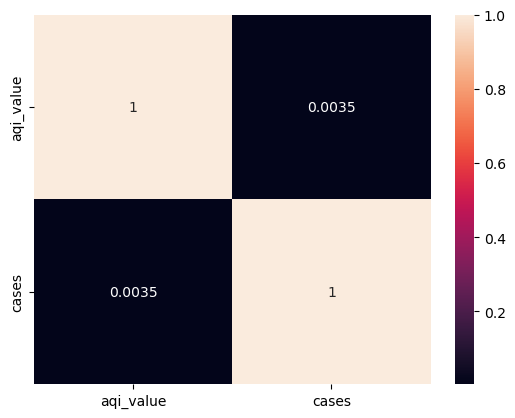

In [311]:
correlation=merge[["aqi_value","cases"]].corr()

sns.heatmap(correlation,fmt='.2g',annot=True)
plt.show()

*3. Demand Triggers: Examine the relationship between pollution spikes and shifts in consumer behavior related to air purifier demand.*

In [65]:
# show the different types of fule.
vahan_data["fuel"].unique()

array(['DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'PETROL/ETHANOL', 'PURE EV',
       'PETROL/HYBRID', 'STRONG HYBRID EV', 'CNG ONLY', 'PETROL/CNG',
       'ETHANOL', 'DIESEL/HYBRID', 'NOT APPLICABLE', 'LPG ONLY',
       'PLUG-IN HYBRID EV', 'LNG', 'DUAL DIESEL/LNG', 'PETROL/LPG',
       'FUEL CELL HYDROGEN', 'SOLAR', 'DUAL DIESEL/CNG'], dtype=object)

In [66]:
vehicle=vahan_data[vahan_data["fuel"].isin(['DIESEL','PETROL'])].groupby(["state","fuel"])['value'].sum().reset_index()
vehicle

,state,fuel,value
0,Andaman and Nicobar Islands,DIESEL,2318
1,Andaman and Nicobar Islands,PETROL,21119
2,Andhra Pradesh,DIESEL,310087
3,Andhra Pradesh,PETROL,2083619
4,Arunachal Pradesh,DIESEL,24105
...,...,...,...
65,Uttar Pradesh,PETROL,8343913
66,Uttarakhand,DIESEL,68361
67,Uttarakhand,PETROL,644202
68,West Bengal,DIESEL,209696


In [67]:
idsp_data['year'].max()

2025

In [68]:
aqi_data["date"].max()# latest date , pollution level aqi level

Timestamp('2025-04-30 00:00:00')

In [69]:
# AQI: Filter for 30-04-2025
aqi_2025 = aqi_data[aqi_data['date']=='31-12-2024'][['state','aqi_value','prominent_pollutants']]
aqi_2025

,state,aqi_value,prominent_pollutants
27329,Assam,63,PM2.5
27330,Chhattisgarh,42,PM10
27331,Karnataka,37,PM10
27332,Maharashtra,93,PM10
27333,Karnataka,42,SO2
...,...,...,...
27553,Kerala,62,"PM2.5,PM10"
27554,Karnataka,133,PM10
27555,Tamil Nadu,48,PM10
27556,Odisha,95,PM10


In [70]:
# AQI: Filter for 30-04-2025
aqi_2025 = aqi_data[aqi_data['date']=='31-12-2024'][['state', 'aqi_value', 'prominent_pollutants']]
aqi_2025

,state,aqi_value,prominent_pollutants
27329,Assam,63,PM2.5
27330,Chhattisgarh,42,PM10
27331,Karnataka,37,PM10
27332,Maharashtra,93,PM10
27333,Karnataka,42,SO2
...,...,...,...
27553,Kerala,62,"PM2.5,PM10"
27554,Karnataka,133,PM10
27555,Tamil Nadu,48,PM10
27556,Odisha,95,PM10


In [72]:
# IDSP: Filter for April 2025 (Week 16)
idsp_2025 = idsp_data[(idsp_data['year'] == 2025) & (idsp_data['week'] == 16)][['state', 'district', 'disease_illness_name', 'cases', 'deaths']]
idsp_2025

,state,district,disease_illness_name,cases,deaths
0,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,22,0
1,Assam,Biswanath,Chickenpox,1,1
2,Assam,Dhemaji,Food Poisoning,16,0
3,Bihar,Gopalganj,Fever with Rash,5,0
4,Bihar,Madhubani,Acute Diarrheal Disease,21,0
5,Bihar,Patna,Chickenpox,8,1
6,Bihar,Vaishali,Chickenpox,9,0
7,Chhattisgarh,Surguja,Food Poisoning,12,0
8,Gujarat,Narmada,Measles,17,0
9,Gujarat,Rajkot,Acute Diarrheal Disease,13,0


In [73]:
vahan_data['month'].unique()

array(['April', 'March', 'February', 'January', 'December', 'November',
       'October', 'September', 'August', 'July', 'June', 'May'],
      dtype=object)

In [74]:
# Vahan: Filter for April 2025
vahan_2025 = vahan_data[(vahan_data['year'] == 2025) & (vahan_data['month'] == 'April')][['state', 'fuel', 'value']]
vahan_2025

,state,fuel,value
0,Andaman and Nicobar Islands,DIESEL,2
1,Andaman and Nicobar Islands,DIESEL,23
2,Andaman and Nicobar Islands,PETROL,1
3,Andaman and Nicobar Islands,ELECTRIC(BOV),1
4,Andaman and Nicobar Islands,PETROL,387
...,...,...,...
2178,West Bengal,PETROL,3
2179,West Bengal,PURE EV,146
2180,West Bengal,DIESEL,25
2181,West Bengal,NOT APPLICABLE,3


In [85]:
vahan_agg = vahan_2025.groupby(['state', 'fuel'])['value'].sum().unstack().fillna(0)
vahan_agg 

fuel,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,LNG,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PLUG-IN HYBRID EV,PURE EV,STRONG HYBRID EV
state,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,541.0,0.0,105.0,18.0,0.0,0.0,5.0,0.0
Andhra Pradesh,703.0,8939.0,11.0,0.0,833.0,2.0,0.0,0.0,1.0,53375.0,605.0,4881.0,455.0,0.0,0.0,4044.0,181.0
Arunachal Pradesh,0.0,925.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,1914.0,1.0,321.0,117.0,0.0,0.0,8.0,10.0
Assam,64.0,2480.0,3.0,0.0,3729.0,1.0,0.0,0.0,28.0,32966.0,29.0,5224.0,539.0,0.0,0.0,2072.0,41.0
Bihar,1824.0,6812.0,2.0,0.0,4279.0,9.0,0.0,238.0,389.0,103725.0,1536.0,11152.0,461.0,0.0,0.0,3525.0,38.0
Chandigarh,12.0,545.0,11.0,0.0,127.0,0.0,0.0,0.0,0.0,2173.0,51.0,355.0,133.0,0.0,0.0,203.0,114.0
Chhattisgarh,13.0,6065.0,4.0,0.0,902.0,2.0,0.0,0.0,1220.0,39612.0,28.0,3453.0,745.0,0.0,0.0,2377.0,65.0
Dadra and Nagar Haveli and Daman and Diu,12.0,716.0,18.0,0.0,7.0,0.0,0.0,0.0,6.0,1450.0,131.0,54.0,38.0,0.0,0.0,21.0,28.0
Delhi,2397.0,1006.0,2.0,0.0,3723.0,4.0,0.0,0.0,3.0,34935.0,3825.0,5765.0,1389.0,0.0,1.0,4964.0,701.0


In [86]:
vahan_agg['total_vehicles'] = vahan_agg.sum(axis=1)
vahan_agg['total_vehicles']

state
Andaman and Nicobar Islands                    710.0
Andhra Pradesh                               74030.0
Arunachal Pradesh                             3307.0
Assam                                        47176.0
Bihar                                       133990.0
Chandigarh                                    3724.0
Chhattisgarh                                 54486.0
Dadra and Nagar Haveli and Daman and Diu      2481.0
Delhi                                        58715.0
Goa                                           6098.0
Gujarat                                     140169.0
Haryana                                      82268.0
Himachal Pradesh                             12107.0
Jammu and Kashmir                            16326.0
Jharkhand                                    61261.0
Karnataka                                   144872.0
Kerala                                       58619.0
Ladakh                                         294.0
Lakshadweep                             

In [87]:
vahan_agg = vahan_agg.reset_index()[['state', 'DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'total_vehicles']]
vahan_agg 

fuel,state,DIESEL,PETROL,ELECTRIC(BOV),total_vehicles
0,Andaman and Nicobar Islands,40.0,541.0,1.0,710.0
1,Andhra Pradesh,8939.0,53375.0,833.0,74030.0
2,Arunachal Pradesh,925.0,1914.0,3.0,3307.0
3,Assam,2480.0,32966.0,3729.0,47176.0
4,Bihar,6812.0,103725.0,4279.0,133990.0
5,Chandigarh,545.0,2173.0,127.0,3724.0
6,Chhattisgarh,6065.0,39612.0,902.0,54486.0
7,Dadra and Nagar Haveli and Daman and Diu,716.0,1450.0,7.0,2481.0
8,Delhi,1006.0,34935.0,3723.0,58715.0
9,Goa,396.0,3868.0,215.0,6098.0


In [340]:
popu

,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN
1,2036,October,West Bengal,Male,22615,value in Thousands,NaN
2,2036,October,West Bengal,Female,21349,value in Thousands,NaN
3,2036,October,Uttarakhand,Total,5506,value in Thousands,NaN
4,2036,October,Uttarakhand,Male,2922,value in Thousands,NaN
...,...,...,...,...,...,...,...
8887,2011,July,Andaman and Nicobar Islands,Male,77,value in Thousands,NaN
8888,2011,July,Andaman and Nicobar Islands,Female,67,value in Thousands,NaN
8889,2011,July,All India,Total,380145,value in Thousands,NaN
8890,2011,July,All India,Male,197066,value in Thousands,NaN


In [75]:
popu["month"].unique()

array(['October', 'March', 'July'], dtype=object)

In [76]:
popu["month"].value_counts()

month
October    2964
March      2964
July       2964
Name: count, dtype: int64

In [77]:
popu.groupby(["state","month","year"])[["value"]].agg(["min","max","mean"]).reset_index()

state    month  year   value                       
                                     min     max           mean
0       All India     July  2011  183079  380145  253430.000000
1       All India     July  2012  187497  389293  259528.666667
2       All India     July  2013  191952  398517  265678.000000
3       All India     July  2014  196449  407828  271885.333333
4       All India     July  2015  200983  417216  278144.000000
...           ...      ...   ...     ...     ...            ...
2959  West Bengal  October  2032   20335   41876   27917.333333
2960  West Bengal  October  2033   20585   42392   28261.333333
2961  West Bengal  October  2034   20838   42913   28608.666667
2962  West Bengal  October  2035   21094   43438   28959.000000
2963  West Bengal  October  2036   21349   43964   29309.333333

[2964 rows x 6 columns]

In [79]:
popu["year"].unique()

array([2036, 2035, 2034, 2033, 2032, 2031, 2030, 2029, 2028, 2027, 2026,
       2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011], dtype=int64)

In [338]:
# population: Filter for July 2011
pop_2011 = popu[(popu['year'] == 2011) & (popu['month'] == 'July') & (popu['gender'] == 'Total')][['state', 'value']]
pop_2011

,state,value
8778,West Bengal,29298
8781,Uttarakhand,3079
8784,Uttar Pradesh,44839
8787,Tripura,978
8790,Telangana,13731
8793,Tamil Nadu,35103
8796,Sikkim,158
8799,Rajasthan,17177
8802,Punjab,10468
8805,Puducherry,861


In [342]:
# population: Filter for October 2036
pop_2036 = popu[(popu['year'] == 2036) & (popu['month'] == 'October')& (popu['gender'] == 'Total')][['state', 'value']]
pop_2036

,state,value
0,West Bengal,43964
3,Uttarakhand,5506
6,Uttar Pradesh,67511
9,Tripura,2499
12,Telangana,22817
15,Tamil Nadu,46767
18,Sikkim,576
21,Rajasthan,25950
24,Punjab,15329
27,Puducherry,1588


In [82]:
# merge the both data.
pop_merged = pop_2011.merge(pop_2036, on='state', suffixes=('_2011', '_2036'))
pop_merged

,state,value_2011,value_2036
0,West Bengal,29298,43964
1,Uttarakhand,3079,5506
2,Uttar Pradesh,44839,67511
3,Tripura,978,2499
4,Telangana,13731,22817
5,Tamil Nadu,35103,46767
6,Sikkim,158,576
7,Rajasthan,17177,25950
8,Punjab,10468,15329
9,Puducherry,861,1588


In [344]:
# find the population value of 2025 from the population data.
pop_merged['value_2025'] = pop_merged['value_2011'] + (pop_merged['value_2036'] - pop_merged['value_2011']) * (2025 - 2011) / (2036 - 2011)
pop_2025 = pop_merged[['state','value_2025']].rename(columns={'value_2025': 'population'})
pop_2025

,state,population
0,West Bengal,37510.96
1,Uttarakhand,4438.12
2,Uttar Pradesh,57535.32
3,Tripura,1829.76
4,Telangana,18819.16
5,Tamil Nadu,41634.84
6,Sikkim,392.08
7,Rajasthan,22089.88
8,Punjab,13190.16
9,Puducherry,1268.12


In [88]:
# Merge AQI and population
merged_df = aqi_2025.merge(pop_2025, on='state', how='inner')
merged_df

,state,aqi_value,prominent_pollutants,population
0,Assam,63,PM2.5,5765.60
1,Chhattisgarh,42,PM10,8671.56
2,Karnataka,37,PM10,31078.84
3,Maharashtra,93,PM10,62611.12
4,Karnataka,42,SO2,31078.84
...,...,...,...,...
224,Kerala,62,"PM2.5,PM10",27251.28
225,Karnataka,133,PM10,31078.84
226,Tamil Nadu,48,PM10,41634.84
227,Odisha,95,PM10,8986.92


In [89]:
# Merge with Vahan
merged_df = merged_df.merge(vahan_agg, on='state', how='left').fillna({'DIESEL': 0, 'PETROL': 0, 'ELECTRIC(BOV)': 0, 'total_vehicles': 0})
merged_df

,state,aqi_value,prominent_pollutants,population,DIESEL,PETROL,ELECTRIC(BOV),total_vehicles
0,Assam,63,PM2.5,5765.60,2480.0,32966.0,3729.0,47176.0
1,Chhattisgarh,42,PM10,8671.56,6065.0,39612.0,902.0,54486.0
2,Karnataka,37,PM10,31078.84,14397.0,88393.0,3411.0,144872.0
3,Maharashtra,93,PM10,62611.12,29150.0,175633.0,2553.0,275888.0
4,Karnataka,42,SO2,31078.84,14397.0,88393.0,3411.0,144872.0
...,...,...,...,...,...,...,...,...
224,Kerala,62,"PM2.5,PM10",27251.28,4256.0,34821.0,1534.0,58619.0
225,Karnataka,133,PM10,31078.84,14397.0,88393.0,3411.0,144872.0
226,Tamil Nadu,48,PM10,41634.84,14219.0,104616.0,2785.0,167056.0
227,Odisha,95,PM10,8986.92,6769.0,48921.0,792.0,71046.0


In [346]:
# Merge with IDSP (aggregate cases by state)
idsp_agg = idsp_2025.groupby('state')['cases'].sum().reset_index()
merged_df = merged_df.merge(idsp_agg, on='state', how='left').fillna({'cases': 0})
merged_df

,state,aqi_value,prominent_pollutants,population,DIESEL,PETROL,ELECTRIC(BOV),total_vehicles,cases_x,cases_y,cases
0,Assam,63,PM2.5,5765.60,2480.0,32966.0,3729.0,47176.0,17.0,17.0,17.0
1,Chhattisgarh,42,PM10,8671.56,6065.0,39612.0,902.0,54486.0,12.0,12.0,12.0
2,Karnataka,37,PM10,31078.84,14397.0,88393.0,3411.0,144872.0,0.0,NaN,0.0
3,Maharashtra,93,PM10,62611.12,29150.0,175633.0,2553.0,275888.0,191.0,191.0,191.0
4,Karnataka,42,SO2,31078.84,14397.0,88393.0,3411.0,144872.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
224,Kerala,62,"PM2.5,PM10",27251.28,4256.0,34821.0,1534.0,58619.0,219.0,219.0,219.0
225,Karnataka,133,PM10,31078.84,14397.0,88393.0,3411.0,144872.0,0.0,NaN,0.0
226,Tamil Nadu,48,PM10,41634.84,14219.0,104616.0,2785.0,167056.0,139.0,139.0,139.0
227,Odisha,95,PM10,8986.92,6769.0,48921.0,792.0,71046.0,51.0,51.0,51.0


In [95]:
correlation = merged_df[['aqi_value', 'DIESEL', 'PETROL', 'total_vehicles', 'population', 'cases_x','cases_y']].corr()
correlation
# 'DIESEL', 'PETROL', 'total_vehicles'

,aqi_value,DIESEL,PETROL,total_vehicles,population,cases_x,cases_y
aqi_value,1.000000,-0.145452,-0.102827,-0.118956,-0.113667,0.024279,-0.116735
DIESEL,-0.145452,1.000000,0.778658,0.831478,0.851074,0.107529,0.260282
PETROL,-0.102827,0.778658,1.000000,0.991833,0.845846,0.090782,0.301182
total_vehicles,-0.118956,0.831478,0.991833,1.000000,0.894379,0.081130,0.247873
population,-0.113667,0.851074,0.845846,0.894379,1.000000,0.158767,0.197051
cases_x,0.024279,0.107529,0.090782,0.081130,0.158767,1.000000,1.000000
cases_y,-0.116735,0.260282,0.301182,0.247873,0.197051,1.000000,1.000000


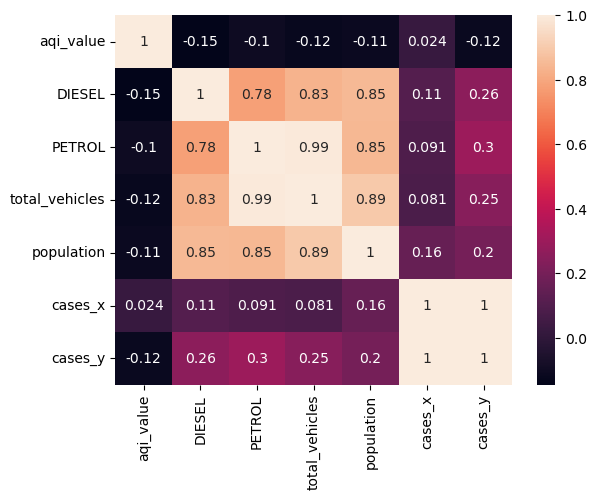

In [97]:
sns.heatmap(correlation,fmt='.2g',annot=True)
plt.show()

In [99]:
import pandas as pd

# Data
data = {
    'Brand': ['Dyson', 'Philips', 'Xiaomi', 'Coway', 'Eureka Forbes', 
              'Honeywell', 'Sharp', 'Panasonic', 'Samsung', 'LG'],
    'Price Range': ['Premium', 'Mid-range', 'Budget-friendly', 'Mid-high', 'Mid-range',
                    'Mid-high', 'Mid-range', 'Mid-range', 'Mid-range', 'Mid-range'],
    'Filtration Stages': ['Multi-stage', 'Multi-stage', '3–4 stages', 'Multi-stage', '3–4 stages',
                          'Multi-stage', 'Multi-stage', 'Multi-stage', 'Multi-stage', 'Multi-stage'],
    'Smart Features': ['Voice control, app', 'Basic app control', 'Smart connectivity, app', 
                       'Limited app features', 'Limited smart features', 'Minimal app features', 
                       'Basic smart features', 'Limited smart features', 'App connectivity', 'App connectivity'],
    'Special/Technology': ['Advanced HEPA + carbon filters', 'True HEPA, low noise', 'Efficient CADR, compact design',
                           'High CADR, long-lasting filters', 'Plasma ionizer for allergens', 'Energy-efficient, high CADR',
                           'Plasmacluster technology', 'Energy-saving features', 'Modern design, smart sensors', 'Stylish design, efficient filters']
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Brand,Price Range,Filtration Stages,Smart Features,Special/Technology
0,Dyson,Premium,Multi-stage,"Voice control, app",Advanced HEPA + carbon filters
1,Philips,Mid-range,Multi-stage,Basic app control,"True HEPA, low noise"
2,Xiaomi,Budget-friendly,3–4 stages,"Smart connectivity, app","Efficient CADR, compact design"
3,Coway,Mid-high,Multi-stage,Limited app features,"High CADR, long-lasting filters"
4,Eureka Forbes,Mid-range,3–4 stages,Limited smart features,Plasma ionizer for allergens
5,Honeywell,Mid-high,Multi-stage,Minimal app features,"Energy-efficient, high CADR"
6,Sharp,Mid-range,Multi-stage,Basic smart features,Plasmacluster technology
7,Panasonic,Mid-range,Multi-stage,Limited smart features,Energy-saving features
8,Samsung,Mid-range,Multi-stage,App connectivity,"Modern design, smart sensors"
9,LG,Mid-range,Multi-stage,App connectivity,"Stylish design, efficient filters"
